In [2]:
import torch
import torch.nn as nn
import torch.autograd as autograd
from torch.autograd import Variable
import torch.nn.functional as F
import math
import numpy as np

In [3]:
def form_hamiltonian(sites=20, e_n = 1, t_n = 1):
    
    def gen_triples(N):
        i, j, k = (0, 0, 0)
        coords = []
        for i in range(N):
            for j in range(N):
                for k in range(N):
                    coords.append((i,j,k))

        return coords
    
    coords = gen_triples(sites)
    mapping = {i: coords[i] for i in range(len(coords))}
    inv_mapping = {coords[i]: i for i in range(len(coords))}
    H = np.zeros((sites ** 3, sites ** 3), dtype = complex)
    print(len(coords))
    for i in range(sites ** 3):
        x, y, z = mapping[i]
        H[i, i] = e_n
        if (z + 1 < sites):
            H[i, i+1] = t_n
        if y + 1 < sites:
            H[i, i+sites] = t_n
        if x + 1 < sites:
            H[i, i+sites**2] = t_n
        if z > 0:
            H[i, i-1] = t_n
        if y > 0:
            H[i, i-sites] = t_n
        if x > 0:
            H[i, i-sites**2] = t_n
            
    return gen_triples, H

gen_triples, H = form_hamiltonian()
H

8000


array([[1.+0.j, 1.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
       [1.+0.j, 1.+0.j, 1.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 1.+0.j, 1.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
       ...,
       [0.+0.j, 0.+0.j, 0.+0.j, ..., 1.+0.j, 1.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, ..., 1.+0.j, 1.+0.j, 1.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 1.+0.j, 1.+0.j]])

In [10]:
H = torch.Tensor(np.real(H))
z = torch.zeros_like(H).fill_(3)
inp = torch.cat((H.unsqueeze(0), z.unsqueeze(0)), dim = 0)
inp = inp.unsqueeze(0)
inp.shape

torch.Size([1, 2, 8000, 8000])

In [11]:
inp

tensor([[[[1., 1., 0.,  ..., 0., 0., 0.],
          [1., 1., 1.,  ..., 0., 0., 0.],
          [0., 1., 1.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 1., 1., 0.],
          [0., 0., 0.,  ..., 1., 1., 1.],
          [0., 0., 0.,  ..., 0., 1., 1.]],

         [[3., 3., 3.,  ..., 3., 3., 3.],
          [3., 3., 3.,  ..., 3., 3., 3.],
          [3., 3., 3.,  ..., 3., 3., 3.],
          ...,
          [3., 3., 3.,  ..., 3., 3., 3.],
          [3., 3., 3.,  ..., 3., 3., 3.],
          [3., 3., 3.,  ..., 3., 3., 3.]]]])

In [12]:
class CNNEncoder(nn.Module):
    """Maps a Hamiltonian and an energy input a hidden vector"""
    def __init__(self):
        super(CNNEncoder, self).__init__()
#         self.layer1 = nn.Sequential(
#             nn.Conv2d(2, 16, kernel_size=5, stride=1, padding=2),
#             nn.BatchNorm2d(16),
#             nn.ReLU(),
#             nn.MaxPool2d(kernel_size=2, stride=2))
        self.conv1 = nn.Conv2d(2, 16, kernel_size=5, stride=1, padding=2)
        
#         self.hidden_dim = hidden_dim
#         self.lstm = nn.LSTM(input_dim, hidden_dim)
#         self.use_cuda = use_cuda
#         self.enc_init_state = self.init_hidden(hidden_dim)

    def forward(self, inputs):
        out = self.conv1(inputs)
        return out
    
v = CNNEncoder()

        
        
        
    
    
    
    

In [14]:
v(inp).shape

torch.Size([1, 16, 8000, 8000])

In [ ]:
torch.Tensor([H, z])

In [ ]:
torch.cat((H, z), dim = 2).shape

In [ ]:
data = array(data)
# decode sequence
result = beam_search_decoder(data, 3)
# print result
for seq in result:
	print(seq)

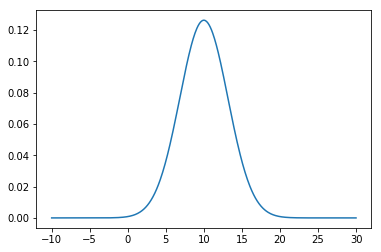

In [6]:
from scipy.stats import norm
import numpy as np
def f(x):
    return norm.pdf(x, 10, 10**0.5)

x = np.linspace(-10,30,500)
import matplotlib.pyplot as plt
plt.plot(x,f(x))
plt.show()